Example of using ptm_pred to prototype phosphorylation classifiers 


Histadine Phosphorylation is a quick place to start, not much data though. However, that means the code runs much faster.

Predictor is the class which handles reading the data, sequence vector is a function which vectorizes a protien sequence into a feature array representing amino acids as integer values between 0-20. 0 represents empty space to average out vector length. It can also include hydrophobicity as a feature.  


In [1]:
from pred import Predictor
from pred import sequence_vector

Next we are going to load our data and generate random negative data aka gibberish data. The clean data files has negatives created from the data sets pulled from phosphoELM and dbptm. 

In generate_random_data the amino acid parameter represents the amino acid being modified aka the target amino acid modification, the float being passed through is multiplier. For example we use .5 here, that means that .5 * number of data points = random negatives generated.

In [2]:
y = Predictor()
y.load_data(file="Data/Training/clean_h.csv")
y.generate_random_data(.5, amino_acid="H")

Loading Data
Loaded Data


Next we vectorize the sequences, we are gonna use the sequence vector

In [3]:
y.vectorize("sequence")

Applying Vector Function
Finished Applying Vector Function


Now we can apply a data balancing function, here we are using adasyn which generates synthetic examples of the minority (in this case positive) class. 

In [4]:
y.balance_data("ADASYN")
y.supervised_training("mlp_adam")

Balancing Data
Balanced Data
Starting Training
608 608
Test Results
(array([ 1.        ,  0.92592593]), array([ 0.94444444,  1.        ]), array([ 0.97142857,  0.96153846]), array([36, 25]))


/Users/mark/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/mark/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:375: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Now we can get fancy and throw in a couple pretty pictures to help visualize our results. 

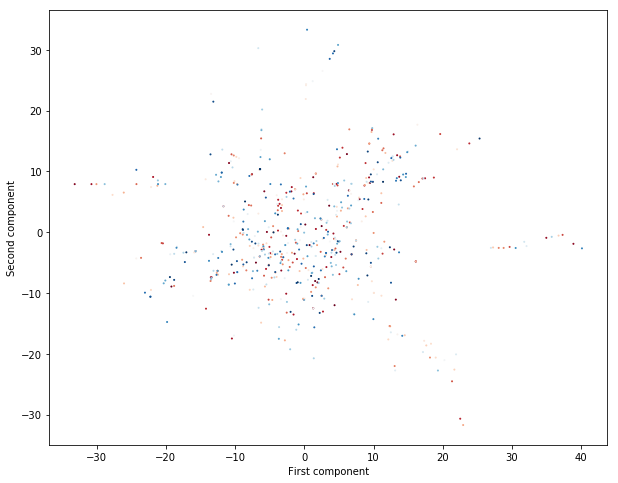

In [5]:
y.generate_pca()

But what if PCA isn't giving enough information, why not use TSNE?
Warning TSNE is can be pretty intense and struggles on larger data sets. 

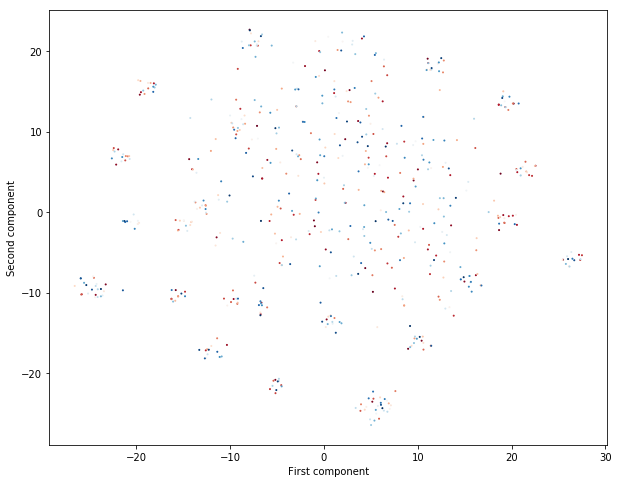

In [7]:
y.generate_tsne()

And now you have built a PTM pipeline! 
But what if you wanna make sure your classifier isn't overfitted? Well we have the dbptm benchmark sets for this!